# Algoritmos de Inteligência Artificial para Clustericação [24E4_2]

## PROJETO DA DISCIPLINA - ENTREGA FINAL

### Aluno: Marcio Feldmann
### Repositório Público GitHub: https://github.com/marciofeld/infnet_algoritmos_clusterizacao

## Parte 1 - Infraestrutura

Para as questões a seguir, você deverá executar códigos em um notebook Jupyter, rodando em ambiente local, certifique-se que:

1. Você está rodando em Python 3.9+
2. Você está usando um ambiente virtual: Virtualenv ou Anaconda
3. Todas as bibliotecas usadas nesse exercícios estão instaladas em um ambiente virtual específico
4. Gere um arquivo de requerimentos (requirements.txt) com os pacotes necessários. É necessário se certificar que a versão do pacote está disponibilizada.
5. Tire um printscreen do ambiente que será usado rodando em sua máquina.
6. Disponibilize os códigos gerados, assim como os artefatos acessórios (requirements.txt) e instruções em um repositório GIT público. (se isso não for feito, o diretório com esses arquivos deverá ser enviado compactado no moodle).

In [1]:
# Parte 1 - Importação de bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import cdist
from scipy.cluster.hierarchy import dendrogram, linkage

## Parte 2 - Escolha de base de dados

Para as questões a seguir, usaremos uma base de dados e faremos a análise exploratória dos dados, antes da clusterização.

1. Baixe os dados disponibilizados na plataforma Kaggle sobre dados sócio-econômicos e de saúde que determinam o índice de desenvolvimento de um país. Esses dados estão disponibilizados através do link: [https://www.kaggle.com/datasets/rohan0301/unsupervised-learning-on-country-data](https://www.kaggle.com/datasets/rohan0301/unsupervised-learning-on-country-data)
2. Quantos países existem no dataset?
3. Mostre através de gráficos a faixa dinâmica das variáveis que serão usadas nas tarefas de clusterização. Analise os resultados mostrados. O que deve ser feito com os dados antes da etapa de clusterização?
4. Realize o pré-processamento adequado dos dados.

In [2]:
# Parte 2 - Importação da Base de Dados
# INPUT: Country-data.csv

dataset = pd.read_csv('Country-data.csv')
dataset.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
# Parte 2 - Exercício 2

qnt_paises = dataset['country'].nunique()
print('\033[1mParte 2 - Exercício 2 - Quantos países existem no dataset?\033[0m\n')
print(f'Resposta do Exercício 2: \033[1m{qnt_paises}\033[0m')

Parte 2 - Exercício 2 - Quantos países existem no dataset?

Resposta do Exercício 2: 167


In [4]:
# Definição das colunas de dados

colunas_de_dados = ['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']

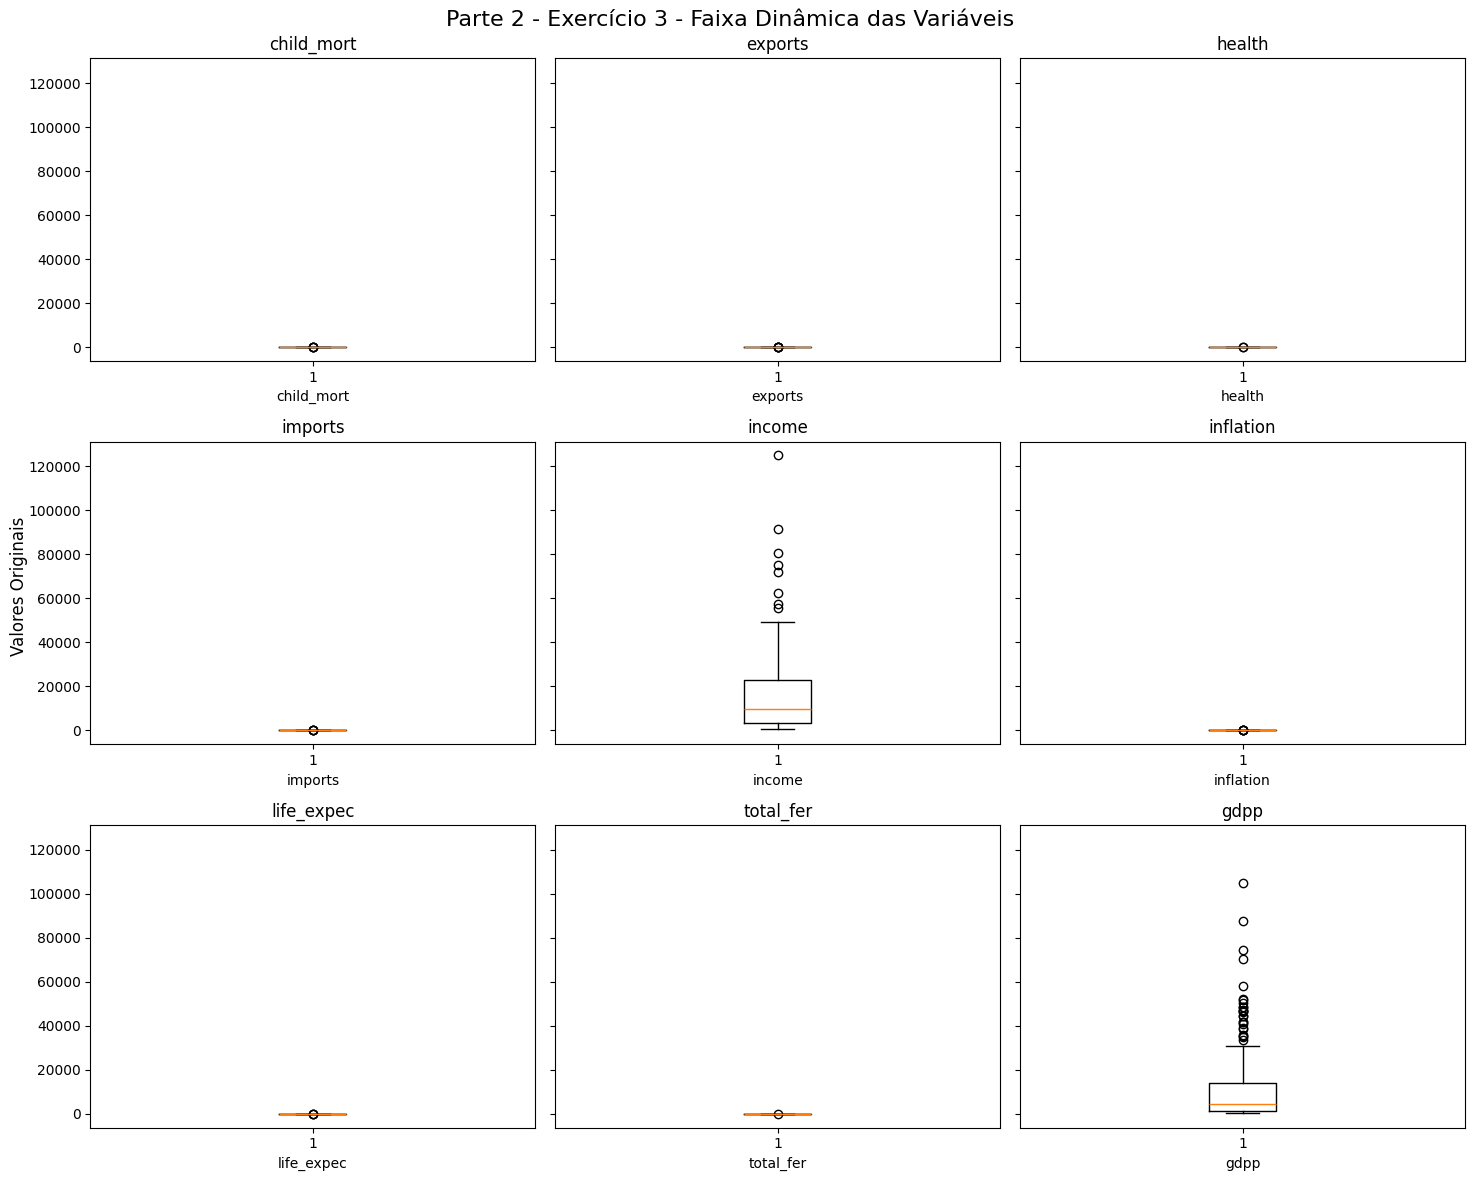

In [5]:
# Parte 2 - Exercício 3 - Mostre através de gráficos a faixa dinâmica das variáveis que serão utilizadas nas tarefas de clusterização.

n_linhas = 3
n_colunas = 3

fig, axes = plt.subplots(n_linhas, n_colunas, figsize=(15, 12), sharey=True)
axes = axes.flatten()

for i, coluna in enumerate(colunas_de_dados):
    axes[i].boxplot(dataset[coluna])
    axes[i].set_title(coluna)
    axes[i].set_xlabel(coluna)

fig.supylabel('Valores Originais')
fig.suptitle('Parte 2 - Exercício 3 - Faixa Dinâmica das Variáveis', fontsize=16)
plt.tight_layout()
plt.show()

In [6]:
# Parte 2 - Exercício 3 - Analise os resultados mostrados. O que deve ser feito com os dados antes da etapa de clusterização?

print('\033[1mParte 2 - Exercício 3 - Resposta\033[0m\n')
print('Após a análise dos resultados da faixa dinâmica das variáveis, verifico que devemos executar uma normalização de todas as colunas de dados na etapa de pré-processamento.')

Parte 2 - Exercício 3 - Resposta

Após a análise dos resultados da faixa dinâmica das variáveis, verifico que devemos executar uma normalização de todas as colunas de dados na etapa de pré-processamento.


In [7]:
# Parte 2 - Exercício 4 - Realize o pré-processamento adequado dos dados (1)

# Mapeando nomes de países para números
pais_para_numero = {country: i for i, country in enumerate(dataset['country'])}
# Mapeando números para nomes de países
numero_para_pais = {i: country for country, i in pais_para_numero.items()}

print('\033[1mDicionário: pais_para_numero\033[0m')
print(pais_para_numero)
print('\033[1mDicionário: numero_para_pais\033[0m')
print(numero_para_pais)

Dicionário: pais_para_numero
{'Afghanistan': 0, 'Albania': 1, 'Algeria': 2, 'Angola': 3, 'Antigua and Barbuda': 4, 'Argentina': 5, 'Armenia': 6, 'Australia': 7, 'Austria': 8, 'Azerbaijan': 9, 'Bahamas': 10, 'Bahrain': 11, 'Bangladesh': 12, 'Barbados': 13, 'Belarus': 14, 'Belgium': 15, 'Belize': 16, 'Benin': 17, 'Bhutan': 18, 'Bolivia': 19, 'Bosnia and Herzegovina': 20, 'Botswana': 21, 'Brazil': 22, 'Brunei': 23, 'Bulgaria': 24, 'Burkina Faso': 25, 'Burundi': 26, 'Cambodia': 27, 'Cameroon': 28, 'Canada': 29, 'Cape Verde': 30, 'Central African Republic': 31, 'Chad': 32, 'Chile': 33, 'China': 34, 'Colombia': 35, 'Comoros': 36, 'Congo, Dem. Rep.': 37, 'Congo, Rep.': 38, 'Costa Rica': 39, "Cote d'Ivoire": 40, 'Croatia': 41, 'Cyprus': 42, 'Czech Republic': 43, 'Denmark': 44, 'Dominican Republic': 45, 'Ecuador': 46, 'Egypt': 47, 'El Salvador': 48, 'Equatorial Guinea': 49, 'Eritrea': 50, 'Estonia': 51, 'Fiji': 52, 'Finland': 53, 'France': 54, 'Gabon': 55, 'Gambia': 56, 'Georgia': 57, 'Germany'

In [8]:
# Parte 2 - Exercício 4 - Realize o pré-processamento adequado dos dados (2)

# Realizando normalização de dados
scaler = MinMaxScaler()
dataset_normalizado = scaler.fit_transform(dataset[colunas_de_dados])
dataset_normalizado = pd.DataFrame(dataset_normalizado, columns=colunas_de_dados)

# Inserindo na primeira coluna do `dataset_normalizado` os códigos numéricos de cada país
dataset_normalizado.insert(0, 'country_code', dataset['country'].map(pais_para_numero))

print('\033[1mDataset Normalizado com códigos numéricos para os países:\033[0m')
print(dataset_normalizado)

Dataset Normalizado com códigos numéricos para os países:
     country_code  child_mort   exports    health   imports    income  \
0               0    0.426485  0.049482  0.358608  0.257765  0.008047   
1               1    0.068160  0.139531  0.294593  0.279037  0.074933   
2               2    0.120253  0.191559  0.146675  0.180149  0.098809   
3               3    0.566699  0.311125  0.064636  0.246266  0.042535   
4               4    0.037488  0.227079  0.262275  0.338255  0.148652   
..            ...         ...       ...       ...       ...       ...   
162           162    0.129503  0.232582  0.213797  0.302609  0.018820   
163           163    0.070594  0.142032  0.192666  0.100809  0.127750   
164           164    0.100779  0.359651  0.312617  0.460715  0.031200   
165           165    0.261441  0.149536  0.209447  0.197397  0.031120   
166           166    0.391918  0.184556  0.253574  0.177275  0.021473   

     inflation  life_expec  total_fer      gdpp  
0     0.126144 

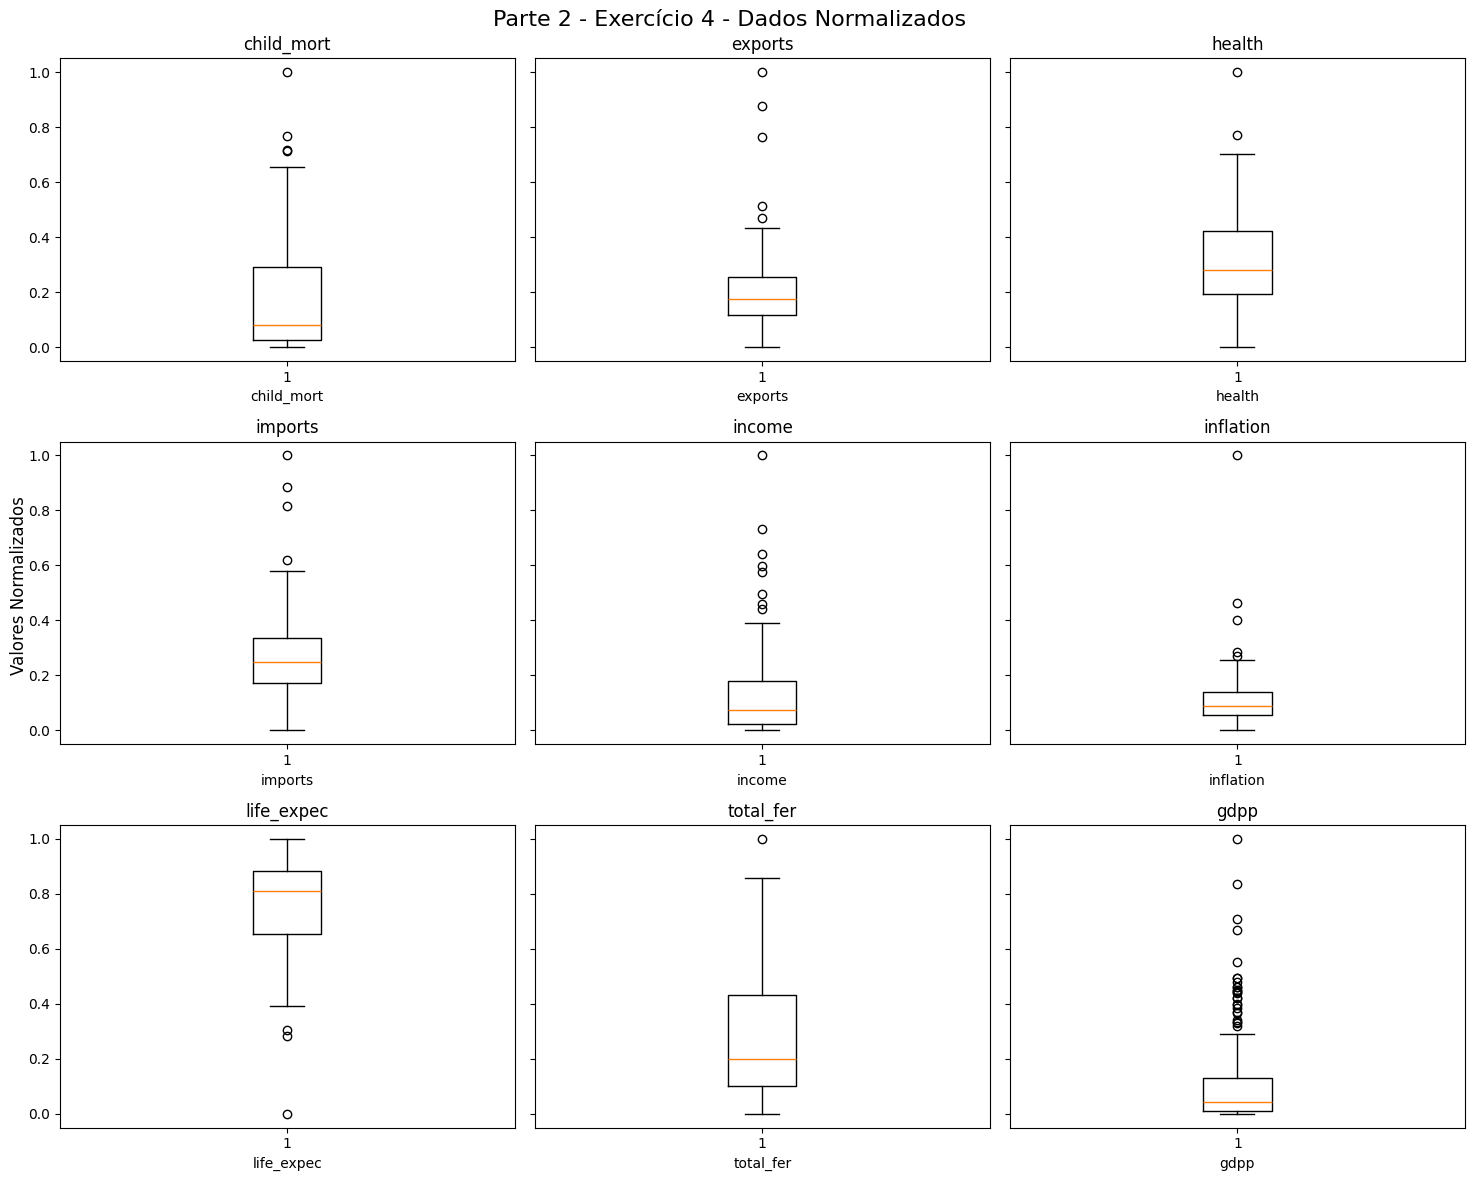

In [9]:
# Parte 2 - Exercício 4 - Realize o pré-processamento adequado dos dados (3)

n_linhas = 3
n_colunas = 3

fig, axes = plt.subplots(n_linhas, n_colunas, figsize=(15, 12), sharey=True)
axes = axes.flatten()

for i, coluna in enumerate(colunas_de_dados):
    axes[i].boxplot(dataset_normalizado[coluna])
    axes[i].set_title(coluna)
    axes[i].set_xlabel(coluna)

fig.supylabel('Valores Normalizados')
fig.suptitle('Parte 2 - Exercício 4 - Dados Normalizados', fontsize=16)
plt.tight_layout()
plt.show()

## Parte 3 - Clusterização

Para os dados pré-processados da etapa anterior você irá:

1. Realizar o agrupamento dos países em 3 grupos distintos. Para tal, use:
    - a. K-Médias
    - b. Clusterização Hierárquica
2. Para os resultados, do K-Médias:
    - a. Interprete cada um dos clusters obtidos citando:
        - i. Qual a distribuição das dimensões em cada grupo
        - ii. O país, de acordo com o algoritmo, melhor representa o seu agrupamento. Justifique
3. Para os resultados da Clusterização Hierárquica, apresente o dendograma e interprete os resultados
4. Compare os dois resultados, aponte as semelhanças e diferenças e interprete.

In [10]:
# Definição de número de clusters

n_clusters=3

In [11]:
# Parte 3 - Exercício 1.a - Agrupamento dos países em 3 grupos distintos usando K-Médias

kmeans = KMeans(n_clusters=n_clusters,random_state=20)
dataset_normalizado['Cluster_Kmeans'] = kmeans.fit_predict(dataset_normalizado[colunas_de_dados])

print('\033[1mParte 3 - Exercício 1.a - Agrupamento dos países em 3 grupos distintos usando K-Médias\033[0m')
print(
    pd.DataFrame({
        'Country': dataset_normalizado['country_code'].map(numero_para_pais),
        'Cluster_Kmeans': dataset_normalizado['Cluster_Kmeans']
    })
)

Parte 3 - Exercício 1.a - Agrupamento dos países em 3 grupos distintos usando K-Médias
                 Country  Cluster_Kmeans
0            Afghanistan               1
1                Albania               2
2                Algeria               2
3                 Angola               1
4    Antigua and Barbuda               2
..                   ...             ...
162              Vanuatu               2
163            Venezuela               2
164              Vietnam               2
165                Yemen               1
166               Zambia               1

[167 rows x 2 columns]


In [12]:
# Parte 3 - Exercício 1.b - Agrupamento dos países em 3 grupos distintos usando Clusterização Hierárquica

data = dataset_normalizado[colunas_de_dados].values

clusterizacao_hierarquica = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
dataset_normalizado['Cluster_Hierarquico'] = clusterizacao_hierarquica.fit_predict(data)

print('\033[1mParte 3 - Exercício 1.b - Agrupamento dos países em 3 grupos distintos usando Clusterização Hierárquica\033[0m')
print(
    pd.DataFrame({
        'Country': dataset_normalizado['country_code'].map(numero_para_pais),
        'Cluster_Hierarquico': dataset_normalizado['Cluster_Hierarquico']
    })
)

Parte 3 - Exercício 1.b - Agrupamento dos países em 3 grupos distintos usando Clusterização Hierárquica
                 Country  Cluster_Hierarquico
0            Afghanistan                    1
1                Albania                    2
2                Algeria                    2
3                 Angola                    1
4    Antigua and Barbuda                    2
..                   ...                  ...
162              Vanuatu                    2
163            Venezuela                    2
164              Vietnam                    2
165                Yemen                    1
166               Zambia                    1

[167 rows x 2 columns]


In [13]:
# Parte 3 - Exercício 2.a.i - Para os resultados do K-Médias, interprete cada um dos clusters obtidos citando: Qual a distribuição das dimensões em cada grupo (1)

distribuicao_clusters = dataset_normalizado.groupby('Cluster_Kmeans').mean()
print('\033[1mParte 3 - Exercício 2.a.i(1) - Distribuição das dimensões em cada grupo utilizando o K-Médias\033[0m')
print(distribuicao_clusters.iloc[:, 1:10])

Parte 3 - Exercício 2.a.i(1) - Distribuição das dimensões em cada grupo utilizando o K-Médias
                child_mort   exports    health   imports    income  inflation  \
Cluster_Kmeans                                                                  
0                 0.010883  0.289142  0.441962  0.291314  0.368192   0.062890   
1                 0.441503  0.145970  0.281447  0.248553  0.023376   0.150698   
2                 0.095659  0.203542  0.275648  0.271488  0.098919   0.108466   

                life_expec  total_fer      gdpp  
Cluster_Kmeans                                   
0                 0.952373   0.094684  0.416784  
1                 0.538333   0.621485  0.013982  
2                 0.799134   0.178759  0.063018  


In [14]:
# Parte 3 - Exercício 2.a.i - Para os resultados do K-Médias, interprete cada um dos clusters obtidos citando: Qual a distribuição das dimensões em cada grupo (2)

print('\033[1mParte 3 - Exercício 2.a.i - Para os resultados do K-Médias, interprete cada um dos clusters obtidos citando: Qual a distribuição das dimensões em cada grupo\033[0m\n')

def classificar_cluster(valores):
    # Classificar os clusters automaticamente com base em dimensões-chave (income, life_expec e child_mort)
    ## Países desenvolvidos possuem alta renda (income), alta expectativa de vida (life_expec) e baixa mortalidade infantil (child_mort)
    if valores['income'] > 0.3 and valores['life_expec'] > 0.9 and valores['child_mort'] < 0.05:
        return 'Países desenvolvidos'
    ## Países subdesenvolvidos possuem baixa renda (income), baixa expectativa de vida (life_expec) e alta mortalidade infantil (child_mort)
    elif valores['income'] < 0.1 and valores['life_expec'] < 0.6 and valores['child_mort'] > 0.4:
        return 'Países subdesenvolvidos'
    ## Países em desenvolvimento possuem valores intermediários
    else:
        return 'Países em desenvolvimento'

def interpretar_clusters(distribuicao):
    interpretacoes = []
    for cluster, valores in distribuicao.iterrows():
        tipo_cluster = classificar_cluster(valores)
        interpretacao = (
            f'\033[1mCluster {cluster}: {tipo_cluster}\033[0m\n'
            f'- Mortalidade infantil: {valores['child_mort']:.4f}\n'
            f'- Expectativa de vida: {valores['life_expec']:.4f}\n'
            f'- Renda per capita: {valores['income']:.4f}\n'
            f'- Inflação: {valores['inflation']:.4f}\n'
            f'- PIB: {valores['gdpp']:.4f}\n'
        )
        interpretacoes.append(interpretacao)
    return interpretacoes

interpretacoes = interpretar_clusters(distribuicao_clusters)

for interpretacao in interpretacoes:
    print(interpretacao)


Parte 3 - Exercício 2.a.i - Para os resultados do K-Médias, interprete cada um dos clusters obtidos citando: Qual a distribuição das dimensões em cada grupo

Cluster 0: Países desenvolvidos
- Mortalidade infantil: 0.0109
- Expectativa de vida: 0.9524
- Renda per capita: 0.3682
- Inflação: 0.0629
- PIB: 0.4168

Cluster 1: Países subdesenvolvidos
- Mortalidade infantil: 0.4415
- Expectativa de vida: 0.5383
- Renda per capita: 0.0234
- Inflação: 0.1507
- PIB: 0.0140

Cluster 2: Países em desenvolvimento
- Mortalidade infantil: 0.0957
- Expectativa de vida: 0.7991
- Renda per capita: 0.0989
- Inflação: 0.1085
- PIB: 0.0630



In [15]:
# Parte 3 - Exercício 2.a.ii - Para os resultados do K-Médias, interprete cada um dos clusters obtidos citando: O país, de acordo com o algoritmo, melhor representa o seu agrupamento. Justifique (1)

centroides = kmeans.cluster_centers_
distancias = cdist(dataset_normalizado[colunas_de_dados], centroides, metric='euclidean')

representantes = {}
for cluster in range(n_clusters):
    indices_cluster = dataset_normalizado['Cluster_Kmeans'] == cluster
    distancias_cluster = distancias[indices_cluster, cluster]
    indice_mais_proximo = np.argmin(distancias_cluster)
    pais_mais_proximo = dataset_normalizado.loc[indices_cluster].iloc[indice_mais_proximo]['country_code']
    representantes[cluster] = numero_para_pais[pais_mais_proximo]

print('\033[1mParte 3 - Exercício 2.a.ii(1) - Distribuição das dimensões em cada grupo utilizando o K-Médias\033[0m')
print('\033[1mPaíses que melhor representam cada agrupamento:\033[0m\n')
for cluster, pais in representantes.items():
    print(f'\033[1mCluster {cluster}:\033[0m {pais}')

Parte 3 - Exercício 2.a.ii(1) - Distribuição das dimensões em cada grupo utilizando o K-Médias
Países que melhor representam cada agrupamento:

Cluster 0: Iceland
Cluster 1: Guinea
Cluster 2: Suriname


In [16]:
# Parte 3 - Exercício 2.a.ii - Para os resultados do K-Médias, interprete cada um dos clusters obtidos citando: O país, de acordo com o algoritmo, melhor representa o seu agrupamento. Justifique (2)

print('\033[1mParte 3 - Exercício 2.a.ii(2) - Distribuição das dimensões em cada grupo utilizando o K-Médias - Justificativas\033[0m\n')

def justificar_representantes(representantes, centroides, dataset, colunas, numero_para_pais):
    justificativas = []
    
    for cluster, pais in representantes.items():
        country_code = list(numero_para_pais.keys())[list(numero_para_pais.values()).index(pais)]
        valores_pais = dataset[dataset['country_code'] == country_code][colunas].iloc[0]
        valores_centroide = centroides[cluster]
        diferencas = abs(valores_pais - valores_centroide)
        
        menores_indices = diferencas.argsort()[:3]
        menores_colunas = [colunas[i] for i in menores_indices]
        menores_diferencas = [diferencas.iloc[i] for i in menores_indices]
        
        justificativa = (
            f'\033[1mCluster {cluster} - Representante: {pais}\033[0m\n'
            f'Este país foi escolhido porque possui valores próximos ao centróide do cluster.\n'
            f'As 3 dimensões com menor diferença absoluta entre o país \033[1m{pais}\033[0m e o centróide do cluster são:\n'
        )
        
        for coluna, diferenca in zip(menores_colunas, menores_diferencas):
            justificativa += f'- {coluna}: {diferenca:.4f}\n'
        
        justificativas.append(justificativa)
    
    return justificativas

justificativas = justificar_representantes(representantes, centroides, dataset_normalizado, colunas_de_dados, numero_para_pais)

for justificativa in justificativas:
    print(justificativa)


Parte 3 - Exercício 2.a.ii(2) - Distribuição das dimensões em cada grupo utilizando o K-Médias - Justificativas

Cluster 0 - Representante: Iceland
Este país foi escolhido porque possui valores próximos ao centróide do cluster.
As 3 dimensões com menor diferença absoluta entre o país Iceland e o centróide do cluster são:
- child_mort: 0.0109
- gdpp: 0.0191
- exports: 0.0225

Cluster 1 - Representante: Guinea
Este país foi escolhido porque possui valores próximos ao centróide do cluster.
As 3 dimensões com menor diferença absoluta entre o país Guinea e o centróide do cluster são:
- imports: 0.0006
- exports: 0.0051
- gdpp: 0.0100

Cluster 2 - Representante: Suriname
Este país foi escolhido porque possui valores próximos ao centróide do cluster.
As 3 dimensões com menor diferença absoluta entre o país Suriname e o centróide do cluster são:
- inflation: 0.0030
- child_mort: 0.0090
- income: 0.0103



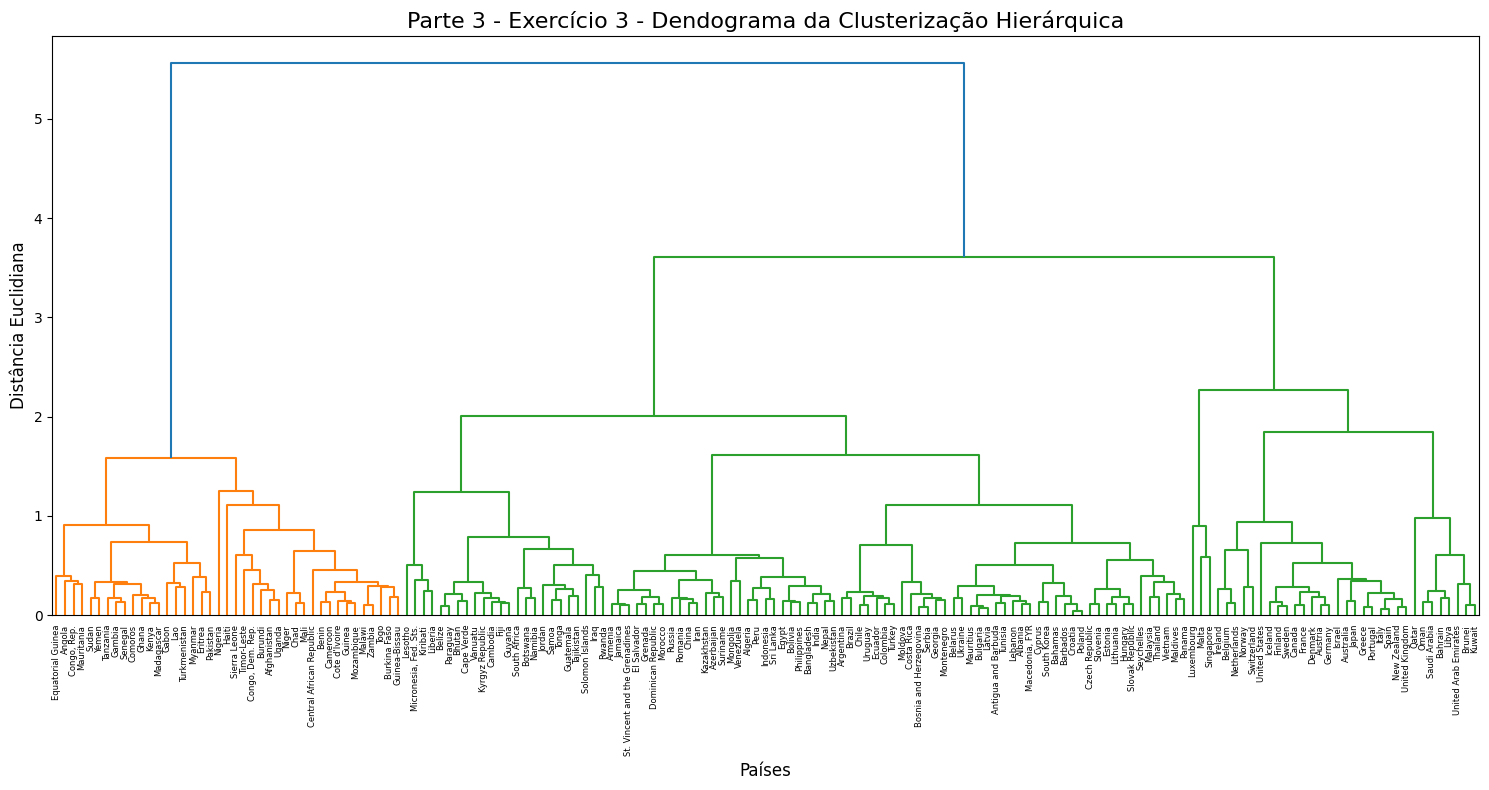

In [17]:
# Parte 3 - Exercício 3 - Para os resultados da Clusterização Hierárquica, apresente o dendograma e interprete os resultados (1)

# Criar a matriz de linkagem para o dendrograma usando o método 'ward'
linkage_matrix = linkage(data, method='ward')

# Função para plotar o dendrograma
plt.figure(figsize=(15, 8))
plt.title('Parte 3 - Exercício 3 - Dendograma da Clusterização Hierárquica', fontsize=16)
plt.xlabel('Países', fontsize=12)
plt.ylabel('Distância Euclidiana', fontsize=12)

dendrogram(
    linkage_matrix,
    labels=dataset_normalizado['country_code'].map(numero_para_pais).values, leaf_rotation=90, leaf_font_size=6,
)

plt.tight_layout()
plt.show()

In [18]:
# Parte 3 - Exercício 3 - Para os resultados da Clusterização Hierárquica, apresente o dendograma e interprete os resultados (2)

# Listar os países em cada cluster hierárquico
for cluster in sorted(dataset_normalizado['Cluster_Hierarquico'].unique()):
    print(f'Cluster {cluster}:')
    print(dataset_normalizado[dataset_normalizado['Cluster_Hierarquico'] == cluster]['country_code']
          .map(numero_para_pais)
          .tolist())
    print()


Cluster 0:
['Australia', 'Austria', 'Bahrain', 'Belgium', 'Brunei', 'Canada', 'Denmark', 'Finland', 'France', 'Germany', 'Greece', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Japan', 'Kuwait', 'Libya', 'Luxembourg', 'Malta', 'Netherlands', 'New Zealand', 'Norway', 'Oman', 'Portugal', 'Qatar', 'Saudi Arabia', 'Singapore', 'Spain', 'Sweden', 'Switzerland', 'United Arab Emirates', 'United Kingdom', 'United States']

Cluster 1:
['Afghanistan', 'Angola', 'Benin', 'Burkina Faso', 'Burundi', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire", 'Equatorial Guinea', 'Eritrea', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Haiti', 'Kenya', 'Lao', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mozambique', 'Myanmar', 'Niger', 'Nigeria', 'Pakistan', 'Senegal', 'Sierra Leone', 'Sudan', 'Tanzania', 'Timor-Leste', 'Togo', 'Turkmenistan', 'Uganda', 'Yemen', 'Zambia']

Cluster 2:
['Albania', 'Algeria', 'Antigua and Barbuda', 'Argentina',

In [19]:
# Parte 3 - Exercício 3 - Para os resultados da Clusterização Hierárquica, apresente o dendograma e interprete os resultados.

print('## Justificativa dos Clusters - Dendograma da Clusterização Hierárquica')

## Cluster 1
print('\n\033[1m### Cluster 1 (Laranja - Subdesenvolvidos)\033[0m')
print('- \033[1mPaíses incluídos\033[0m: Camarões, Angola, Serra Leoa, Congo, entre outros.')
print('- \033[1mJustificação\033[0m:')
print('  - Esses países compartilham baixos indicadores socioeconômicos.')
print('  - \033[1mCaracterísticas principais\033[0m:')
print('    - \033[1mRenda per capita\033[0m: Baixa.')
print('    - \033[1mMortalidade infantil\033[0m: Alta.')
print('    - \033[1mExpectativa de vida\033[0m: Baixa.')

## Cluster 2
print('\n\033[1m### Cluster 2 (Verde à esquerda - Em Desenvolvimento)\033[0m')
print('- \033[1mPaíses incluídos\033[0m: Micronésia, Brasil, Paraguai, entre outros.')
print('- \033[1mJustificação\033[0m:')
print('  - Estes países possuem características intermediárias, tanto sociais quanto econômicas.')
print('  - \033[1mCaracterísticas principais\033[0m:')
print('    - \033[1mRenda per capita\033[0m: Moderada.')
print('    - \033[1mMortalidade infantil\033[0m: Moderada.')
print('    - \033[1mExpectativa de vida\033[0m: Moderada.')

## Cluster 3
print('\n\033[1m### Cluster 3 (Verde à direita - Desenvolvidos)\033[0m')
print('- \033[1mPaíses incluídos\033[0m: Japão, Estados Unidos, Alemanha, entre outros.')
print('- \033[1mJustificação\033[0m:')
print('  - Esses países têm indicadores socioeconômicos elevados, refletindo alto desenvolvimento.')
print('  - \033[1mCaracterísticas principais\033[0m:')
print('    - \033[1mRenda per capita\033[0m: Alta.')
print('    - \033[1mMortalidade infantil\033[0m: Baixa.')
print('    - \033[1mExpectativa de vida\033[0m: Alta.')

## Observações gerais
print('\n\033[1m### Observações gerais\033[0m')
print('- A \033[1maltura das uniões\033[0m no dendograma reflete as diferenças entre os grupos:')
print('  - Clusters unidos em alturas maiores são mais heterogêneos.')
print('  - Clusters unidos em alturas menores são mais homogêneos.')
print('- A separação em 3 grandes clusters foi realizada com base em uma altura de corte de aproximadamente \033[1m2.5\033[0m no eixo Y.')


## Justificativa dos Clusters - Dendograma da Clusterização Hierárquica

### Cluster 1 (Laranja - Subdesenvolvidos)
- Países incluídos: Camarões, Angola, Serra Leoa, Congo, entre outros.
- Justificação:
  - Esses países compartilham baixos indicadores socioeconômicos.
  - Características principais:
    - Renda per capita: Baixa.
    - Mortalidade infantil: Alta.
    - Expectativa de vida: Baixa.

### Cluster 2 (Verde à esquerda - Em Desenvolvimento)
- Países incluídos: Micronésia, Brasil, Paraguai, entre outros.
- Justificação:
  - Estes países possuem características intermediárias, tanto sociais quanto econômicas.
  - Características principais:
    - Renda per capita: Moderada.
    - Mortalidade infantil: Moderada.
    - Expectativa de vida: Moderada.

### Cluster 3 (Verde à direita - Desenvolvidos)
- Países incluídos: Japão, Estados Unidos, Alemanha, entre outros.
- Justificação:
  - Esses países têm indicadores socioeconômicos elevados, refletindo alto desenvolvimento.
  - Caract

In [20]:
# Parte 3 - Exercício 4 - Compare os dois resultados, aponte as semelhanças e diferenças e interprete. (1)
# OUTPUT: parte3_exercicio4_comparacao_clusters.csv

comparacao_clusters = dataset_normalizado[['country_code', 'Cluster_Kmeans', 'Cluster_Hierarquico']].copy()
comparacao_clusters.loc[:, 'Country'] = comparacao_clusters['country_code'].map(numero_para_pais)
comparacao_clusters = comparacao_clusters[['Country', 'Cluster_Kmeans', 'Cluster_Hierarquico']]

# Adicionar uma coluna indicando se os clusters coincidem
comparacao_clusters['Mesmo_Cluster'] = comparacao_clusters['Cluster_Kmeans'] == comparacao_clusters['Cluster_Hierarquico']

# Exibir os primeiros 20 resultados
print('\033[1mParte 3 - Exercício 4 - Tabela comparativa\033[0m\n')
print(comparacao_clusters.head(20))

# Opcional: salvar a tabela de comparação em um arquivo CSV
comparacao_clusters.to_csv('parte3_exercicio4_comparacao_clusters.csv', index=False)
print('Tabela de comparação salva como "parte3_exercicio4_comparacao_clusters.csv"')

Parte 3 - Exercício 4 - Tabela comparativa

                Country  Cluster_Kmeans  Cluster_Hierarquico  Mesmo_Cluster
0           Afghanistan               1                    1           True
1               Albania               2                    2           True
2               Algeria               2                    2           True
3                Angola               1                    1           True
4   Antigua and Barbuda               2                    2           True
5             Argentina               2                    2           True
6               Armenia               2                    2           True
7             Australia               0                    0           True
8               Austria               0                    0           True
9            Azerbaijan               2                    2           True
10              Bahamas               2                    2           True
11              Bahrain               2     

In [21]:
# Parte 3 - Exercício 4 - Compare os dois resultados, aponte as semelhanças e diferenças e interprete. (2)

# Calcular estatísticas para a interpretação
total_paises = len(comparacao_clusters)
contagem_mesmo_cluster = comparacao_clusters['Mesmo_Cluster'].sum()
proporcao_mesmo_cluster = contagem_mesmo_cluster / total_paises

# Países com clusters diferentes
clusters_diferentes = comparacao_clusters[comparacao_clusters['Mesmo_Cluster'] == False]

# Exibir a interpretação
print('\033[1mParte 3 - Exercício 4 - Diferenças\033[0m\n')
print(f'Total de países analisados: {total_paises}')
print(f'Número de países no mesmo cluster nos dois métodos: {contagem_mesmo_cluster}')
print(f'Proporção de países no mesmo cluster: {proporcao_mesmo_cluster:.2%}\n')

if len(clusters_diferentes) > 0:
    print('Países classificados em clusters diferentes:')
    print(clusters_diferentes[['Country', 'Cluster_Kmeans', 'Cluster_Hierarquico']].to_string(index=False))
else:
    print('Todos os países foram classificados no mesmo cluster nos dois métodos.')

Parte 3 - Exercício 4 - Diferenças

Total de países analisados: 167
Número de países no mesmo cluster nos dois métodos: 150
Proporção de países no mesmo cluster: 89.82%

Países classificados em clusters diferentes:
        Country  Cluster_Kmeans  Cluster_Hierarquico
        Bahrain               2                    0
         Cyprus               0                    2
 Czech Republic               0                    2
           Iraq               1                    2
       Kiribati               1                    2
        Lesotho               1                    2
        Liberia               1                    2
          Libya               2                    0
        Myanmar               2                    1
        Namibia               1                    2
           Oman               2                    0
         Rwanda               1                    2
   Saudi Arabia               2                    0
       Slovenia               0            

In [22]:
# Parte 3 - Exercício 4 - Compare os dois resultados, aponte as semelhanças e diferenças e interprete. (3)
# OUTPUT: parte3_exercicio4justificacao_diferencas_clusters.csv

# Selecionar os países classificados de forma diferente
diferencas_clusters = comparacao_clusters[comparacao_clusters['Mesmo_Cluster'] == False]

# Obter os dados completos desses países usando a coluna 'Country'
diferencas_dados = dataset_normalizado[dataset_normalizado['country_code'].map(numero_para_pais).isin(diferencas_clusters['Country'])]

# Adicionar os clusters K-Means e Hierárquico para comparação
diferencas_dados = diferencas_dados[['country_code'] + colunas_de_dados + ['Cluster_Kmeans', 'Cluster_Hierarquico']]
diferencas_dados['Country'] = diferencas_dados['country_code'].map(numero_para_pais)

# Reorganizar as colunas para melhor visualização
diferencas_dados = diferencas_dados[['Country', 'Cluster_Kmeans', 'Cluster_Hierarquico'] + colunas_de_dados]

# Analisar as diferenças entre os clusters
print('\033[1mParte 3 - Exercício 4 - Interpretação\033[0m')
for _, row in diferencas_dados.iterrows():
    print(f'\033[1m\nPaís: {row["Country"]}\033[0m')
    print(f'Cluster K-Means: {row["Cluster_Kmeans"]} | Cluster Hierárquico: {row["Cluster_Hierarquico"]}')
    print('Características principais:')
    for coluna in colunas_de_dados:
        print(f'- {coluna}: {row[coluna]:.4f}')
    print('Justificação:')
    if row['Cluster_Kmeans'] != row['Cluster_Hierarquico']:
        print('-> Diferença de classificação: Este país apresenta características que estão \'na fronteira\' entre os clusters,'
              ' o que leva os dois métodos a classificá-lo de maneira distinta com base nas distâncias e abordagens.')
    print('-' * 50)

# Salvar as diferenças em um arquivo CSV para análise adicional
diferencas_dados.to_csv('parte3_exercicio4_justificacao_diferencas_clusters.csv', index=False)
print('\nArquivo \'parte3_exercicio4_justificacao_diferencas_clusters.csv\' criado com os dados detalhados.')


Parte 3 - Exercício 4 - Interpretação

País: Bahrain
Cluster K-Means: 2 | Cluster Hierárquico: 0
Características principais:
- child_mort: 0.0292
- exports: 0.3471
- health: 0.1964
- imports: 0.2923
- income: 0.3255
- inflation: 0.1077
- life_expec: 0.8659
- total_fer: 0.1593
- gdpp: 0.1954
Justificação:
-> Diferença de classificação: Este país apresenta características que estão 'na fronteira' entre os clusters, o que leva os dois métodos a classificá-lo de maneira distinta com base nas distâncias e abordagens.
--------------------------------------------------

País: Cyprus
Cluster K-Means: 0 | Cluster Hierárquico: 2
Características principais:
- child_mort: 0.0049
- exports: 0.2506
- health: 0.2585
- imports: 0.3302
- income: 0.2676
- inflation: 0.0575
- life_expec: 0.9428
- total_fer: 0.0426
- gdpp: 0.2918
Justificação:
-> Diferença de classificação: Este país apresenta características que estão 'na fronteira' entre os clusters, o que leva os dois métodos a classificá-lo de maneira

## Parte 4 - Escolha de Algoritmos

1. Escreva em tópicos as etapas do algoritmo de K-médias até sua convergência.
2. O algoritmo de K-médias converge até encontrar os centróides que melhor descrevem os clusters encontrados (até o deslocamento entre as interações dos centróides ser mínimo). Lembrando que o centróide é o baricentro do cluster em questão e não representa, em via de regra, um dado existente na base. Refaça o algoritmo apresentado na questão 1 a fim de garantir que o cluster seja representado pelo dado mais próximo ao seu baricentro em todas as iterações do algoritmo.
    - Obs: nesse novo algoritmo, o dado escolhido será chamado medóide.
3. O algoritmo de K-médias é sensível a outliers nos dados. Explique.
4. Por que o algoritmo de DBScan é mais robusto à presença de outliers?

In [23]:
# Parte 4 - Exercício 1 - Escreva em tópicos as etapas do algoritmo de K-médias até sua convergência.

print('\033[1mParte 4 - Exercício 1 - Escreva em tópicos as etapas do algoritmo de K-médias até sua convergência.o\033[0m')

print('\n\033[1mEtapa 1: Escolha do número de grupos (clusters).\033[0m')
print('* Decisão do número de grupos para dividir os dados. Esse número é chamado de k.')

print('\n\033[1mEtapa 2: Posicionamento inicial dos centros (centróides).\033[0m')
print('* Os centróides iniciais são escolhidos automaticamente pelo algoritmo de K-Means.')
print('* No código, usei "KMeans(n_clusters=n_clusters, random_state=20)" para definir o número de clusters e garantir reprodutibilidade.')

print('\n\033[1mEtapa 3: Agrupamento inicial dos pontos.\033[0m')
print('* Para cada ponto nos dados:')
print('   - O algoritmo calcula qual centróide está mais próximo.')
print('   - O ponto é então atribuído ao grupo (cluster) correspondente.')

print('\n\033[1mEtapa 4: Ajuste dos centros dos grupos.\033[0m')
print('* Após a atribuição inicial:')
print('   - O algoritmo calcula o "novo centro" de cada grupo.')
print('   - Este novo centro é a posição média de todos os pontos atribuídos ao grupo.')
print('   - Os centróides são ajustados para essas novas posições.')

print('\n\033[1mEtapa 5: Reagrupamento dos pontos.\033[0m')
print('* Com os centróides ajustados:')
print('   - Cada ponto é reavaliado para verificar qual centróide está mais próximo.')
print('   - Se algum ponto mudar de grupo, o agrupamento é atualizado.')

print('\n\033[1mEtapa 6: Repetição até estabilizar.\033[0m')
print('* O processo de ajuste e reagrupamento continua até que:')
print('   - Nenhum ponto mude de grupo.')
print('   - Ou o algoritmo atinja um número máximo de iterações.')

print('\n\033[1mEtapa 7: Resultados finais.\033[0m')
print('* No final, o algoritmo retorna:')
print('   - Todos os dados divididos em k grupos.')
print('   - Os centróides finais, que representam o "coração" de cada grupo.')


Parte 4 - Exercício 1 - Escreva em tópicos as etapas do algoritmo de K-médias até sua convergência.o

Etapa 1: Escolha do número de grupos (clusters).
* Decisão do número de grupos para dividir os dados. Esse número é chamado de k.

Etapa 2: Posicionamento inicial dos centros (centróides).
* Os centróides iniciais são escolhidos automaticamente pelo algoritmo de K-Means.
* No código, usei "KMeans(n_clusters=n_clusters, random_state=20)" para definir o número de clusters e garantir reprodutibilidade.

Etapa 3: Agrupamento inicial dos pontos.
* Para cada ponto nos dados:
   - O algoritmo calcula qual centróide está mais próximo.
   - O ponto é então atribuído ao grupo (cluster) correspondente.

Etapa 4: Ajuste dos centros dos grupos.
* Após a atribuição inicial:
   - O algoritmo calcula o "novo centro" de cada grupo.
   - Este novo centro é a posição média de todos os pontos atribuídos ao grupo.
   - Os centróides são ajustados para essas novas posições.

Etapa 5: Reagrupamento dos ponto

In [24]:
# Parte 4 - Exercício 2 - O algoritmo de K-médias converge até encontrar os centróides que melhor descrevem os clusters encontrados (até o deslocamento entre as interações dos centróides ser mínimo).
# Lembrando que o centróide é o baricentro do cluster em questão e não representa, em via de regra, um dado existente na base.
# Refaça o algoritmo apresentado na questão 1 a fim de garantir que o cluster seja representado pelo dado mais próximo ao seu baricentro em todas as iterações do algoritmo.
# Obs: nesse novo algoritmo, o dado escolhido será chamado medóide.

# Inicializar os medóides com índices aleatórios
np.random.seed(20)
indices_iniciais = np.random.choice(len(dataset_normalizado), size=n_clusters, replace=False)
medoids = dataset_normalizado[colunas_de_dados].iloc[indices_iniciais].values

# Função para calcular clusters e custo
def atribuir_clusters_e_calcular_custo(data, medoids):
    distancias = cdist(data, medoids, metric='euclidean')  # Distâncias Euclidianas
    clusters = np.argmin(distancias, axis=1)  # Atribuir ao medóide mais próximo
    custo = np.sum(np.min(distancias, axis=1))  # Soma das distâncias mínimas
    return clusters, custo

# Iterar até convergência
medoide_anterior = None
iteracao_kmedoid = 0
while not np.array_equal(medoide_anterior, medoids):
    iteracao_kmedoid += 1
    medoide_anterior = medoids.copy()
    # Atribuir clusters e calcular o custo
    dataset_normalizado['Cluster_Kmedoids'], _ = atribuir_clusters_e_calcular_custo(
        dataset_normalizado[colunas_de_dados].values, medoids
    )
    # Atualizar medóides para o ponto mais central do cluster
    for cluster in range(n_clusters):
        cluster_points = dataset_normalizado[dataset_normalizado['Cluster_Kmedoids'] == cluster][colunas_de_dados].values
        medoid_index = np.argmin(np.sum(cdist(cluster_points, cluster_points, metric='euclidean'), axis=1))
        medoids[cluster] = cluster_points[medoid_index]

# Exibir os resultados
print('\033[1mParte 4 - Exercício 2 - Utilização de K-medoids\033[0m\n')

print(f'Convergência alcançada após \033[1m{iteracao_kmedoid}\033[0m iterações\n')

print(
    pd.DataFrame({
        'Country': dataset_normalizado['country_code'].map(numero_para_pais),
        'Cluster_Kmedoids': dataset_normalizado['Cluster_Kmedoids']
    })
)



Parte 4 - Exercício 2 - Utilização de K-medoids

Convergência alcançada após 3 iterações

                 Country  Cluster_Kmedoids
0            Afghanistan                 0
1                Albania                 2
2                Algeria                 2
3                 Angola                 0
4    Antigua and Barbuda                 2
..                   ...               ...
162              Vanuatu                 1
163            Venezuela                 2
164              Vietnam                 2
165                Yemen                 1
166               Zambia                 0

[167 rows x 2 columns]


In [25]:
# Parte 4 - Exercício 3 - O algoritmo de K-médias é sensível a outliers nos dados. Explique.

print('\033[1mParte 4 - Exercício 3 - O algoritmo de K-médias é sensível a outliers nos dados. Explique.\033[0m\n')

print('\033[1mPor que o K-Means é sensível a outliers?\033[0m')
print('* O algoritmo calcula os centróides como a média dos pontos no cluster.')
print('* Outliers, que são valores muito distantes, podem deslocar o centróide, tornando-o menos representativo para a maioria dos pontos.')

print('\n\033[1mImpacto nos agrupamentos:\033[0m')
print('* Os clusters podem ficar distorcidos, não refletindo bem os dados.')
print('* Em alguns casos, os outliers podem até formar clusters próprios, atrapalhando a análise.')

print('\n\033[1mComo evitar o problema?\033[0m')
print('\033[1m1.\033[0m Remover ou tratar os outliers antes de rodar o algoritmo.')
print('\033[1m2.\033[0m Normalizar os dados para reduzir o impacto de valores extremos.')
print('\033[1m3.\033[0m Considerar algoritmos mais robustos, como o K-Medoids, que usa pontos reais como representantes dos clusters.')

print('\n\033[1mFontes:\033[0m')
print('* Sensibilidade do K-Médias: https://scikit-learn.org/stable/modules/clustering.html#k-means')
print('* Comparação K-Médias e K-Medoids: https://www.geeksforgeeks.org/k-means-vs-k-medoids-clustering/')
print('* Lidando com Outliers: https://www.datageeks.com.br/outliers/')


Parte 4 - Exercício 3 - O algoritmo de K-médias é sensível a outliers nos dados. Explique.

Por que o K-Means é sensível a outliers?
* O algoritmo calcula os centróides como a média dos pontos no cluster.
* Outliers, que são valores muito distantes, podem deslocar o centróide, tornando-o menos representativo para a maioria dos pontos.

Impacto nos agrupamentos:
* Os clusters podem ficar distorcidos, não refletindo bem os dados.
* Em alguns casos, os outliers podem até formar clusters próprios, atrapalhando a análise.

Como evitar o problema?
1. Remover ou tratar os outliers antes de rodar o algoritmo.
2. Normalizar os dados para reduzir o impacto de valores extremos.
3. Considerar algoritmos mais robustos, como o K-Medoids, que usa pontos reais como representantes dos clusters.

Fontes:
* Sensibilidade do K-Médias: https://scikit-learn.org/stable/modules/clustering.html#k-means
* Comparação K-Médias e K-Medoids: https://www.geeksforgeeks.org/k-means-vs-k-medoids-clustering/
* Lidando c

In [26]:
# Parte 4 - Exercício 4 - Por que o algoritmo de DBScan é mais robusto à presença de outliers?

print('\033[1mParte 4 - Exercício 4 - Por que o algoritmo de DBScan é mais robusto à presença de outliers?\033[0m\n')

print('\033[1mPor que o DBSCAN é mais robusto a outliers?\033[0m')
print('* O algoritmo identifica automaticamente os outliers como pontos que não pertencem a nenhum cluster.')
print('* Ele forma clusters com base na densidade de pontos, ignorando os que estão isolados.')
print('* Diferente do K-Means, o DBSCAN não usa centróides, então outliers não deslocam os clusters.')
print('* Pontos isolados são classificados como ruído e não afetam o agrupamento.')

print('\n\033[1mFontes:\033[0m')
print('* Robustez do DBSCAN: https://scikit-learn.org/stable/modules/clustering.html#dbscan')
print('* Comparação entre DBSCAN e K-Means: https://towardsdatascience.com/dbscan-clustering-explained-97556a2ad556')
print('* Lidando com Outliers: https://www.datageeks.com.br/outliers/')


Parte 4 - Exercício 4 - Por que o algoritmo de DBScan é mais robusto à presença de outliers?

Por que o DBSCAN é mais robusto a outliers?
* O algoritmo identifica automaticamente os outliers como pontos que não pertencem a nenhum cluster.
* Ele forma clusters com base na densidade de pontos, ignorando os que estão isolados.
* Diferente do K-Means, o DBSCAN não usa centróides, então outliers não deslocam os clusters.
* Pontos isolados são classificados como ruído e não afetam o agrupamento.

Fontes:
* Robustez do DBSCAN: https://scikit-learn.org/stable/modules/clustering.html#dbscan
* Comparação entre DBSCAN e K-Means: https://towardsdatascience.com/dbscan-clustering-explained-97556a2ad556
* Lidando com Outliers: https://www.datageeks.com.br/outliers/
